In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from scipy import ndimage

In [4]:
stacks = [np.mean([ndimage.imread('./PSF_cal/im%s_%s.tiff'%(i,j),flatten = True).astype(np.float64)
                   for j in range(1,4)], axis = 0) for i in range(1,38)]

In [5]:
#note shutter duration in ms
#im<21 3176.137
#im22 1588.0685
#im23 204.022 
#im24 41.060
#im26 204.022
#im29 1588.0685
#im34 3176.137

In [6]:
from ipywidgets import interact

def browse_images(stacks):
    n = len(stacks)
    subfrm = stacks[0]
    imshow(subfrm, cmap=plt.cm.gray, interpolation='none')
    def view_image(i):
        frm = stacks[i]
        subfrm = frm
        imshow(subfrm, cmap=plt.cm.gray, interpolation='none')
        show()
    interact(view_image, i=(0,n-1))

In [7]:
def filter_frame(frm):
    box_size = 200
    y = 248
    x = 155
    subfrm = frm[x:x+box_size,y:y+box_size]
    bkg = np.mean(subfrm[:10,:10])
    subfrm -= bkg
    subfrm[subfrm<0] = 0
    high_im = ndimage.gaussian_filter(subfrm,0.5)
    low_im = ndimage.gaussian_filter(subfrm,25)
    subfrm = high_im-low_im
    subfrm[subfrm<0] = 0
    subfrm = subfrm/np.max(subfrm)
    return subfrm

In [8]:
filtered_images = [filter_frame(fr) for fr in stacks[2:]]

In [9]:
len(filtered_images)

35

In [10]:
values = np.array(filtered_images)

In [11]:
nslices = len(values)

In [22]:
from scipy.interpolate import RegularGridInterpolator
# focal plane spacing is 100um
# pixel pitch 0.8639 pixels/um = 1.158 um/pixel
#pnts = (np.linspace(0,34*100,35),
#        np.linspace(0,1.158*199,200),
#        np.linspace(0,1.158*199,200))

pnts = (np.linspace(0,10,35),
        np.linspace(0,1,200),
        np.linspace(0,1,200))

#1024/1024 image 
grid_z, grid_x, grid_y = np.mgrid[0:10:60j,0:1:200j, 0:1:200j]
values = np.array(filtered_images)
PSF = RegularGridInterpolator(pnts, values, method='linear')

In [23]:
interp = PSF((grid_z,grid_x,grid_y))

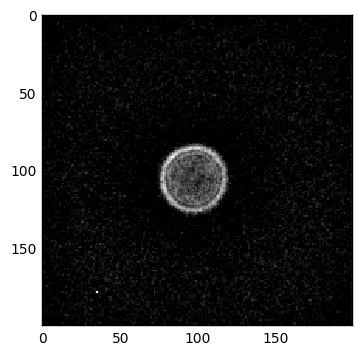

In [24]:
browse_images(interp)

In [15]:
from scipy.interpolate import griddata
#grid_z0 = griddata(points.T, values, (grid_z,grid_x, grid_y), method='linear')

In [104]:
imshow(grid_z0[41],cmap = cm.gray)

In [ ]:
print 'here'

In [177]:
import os

In [189]:
for x in range(33,40):
    for j in range(1,4):
        infile = './PSF_cal/im%s_%s.tiff'%(x,j)
        outfile = './PSF_cal/im%s_%s.tiff'%(x-2,j)
        os.rename(infile,outfile)

In [8]:
ax = subplot(1,1,1)
frm = 0
import time

frm = stacks[0]
subfrm = frm[x:x+box_size,y:y+box_size]
im = ax.imshow(subfrm/np.max(subfrm))
for frm in stacks:
#frm = stacks[20]
    subfrm = frm[x:x+box_size,y:y+box_size]
    im.set_data(subfrm/np.max(subfrm))
    draw()
    time.sleep(0.1)
    #pause(0.01)

In [17]:
tifffiles = [tf for tf in os.listdir('./Point_spread_calibration/') if '.tiff' in tf]

In [19]:
imgs = [ndimage.imread('./Point_spread_calibration/' + tf,flatten = True) for tf in tifffiles]

In [20]:
import time

In [26]:
img = imshow(imgs[0])
for im in imgs:
    img.set_data(im)
    show()
    time.sleep(0.1)

In [ ]:
imshow(imgs[5])